# Nasvhille Scooter Data Analysis
---


In [1]:
%matplotlib inline
import folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from folium.plugins  import HeatMapWithTime

sns.set_style('white')
palette ={"Bird":"sienna",
          "Gotcha":"black",
          "SPIN":"darkorange", 
          "Bolt Mobility":"khaki", 
          "Lime":"limegreen", 
          "Lyft":"fuchsia", 
          "JUMP":"red"}

---
 
Column `companyname` legend:

- 'Bird':0 
- 'Lyft': 1
- 'Gotcha': 2
- 'Lime': 3
- 'Spin': 4
- 'Jump': 5
- 'Bolt': 6

In [2]:
may_df = pd.read_pickle('./data_scooter/may/may.pkl')

Read pickle files into `DataFrame`s.

---

Lets have a quick look at scooter distribution by hour of day.

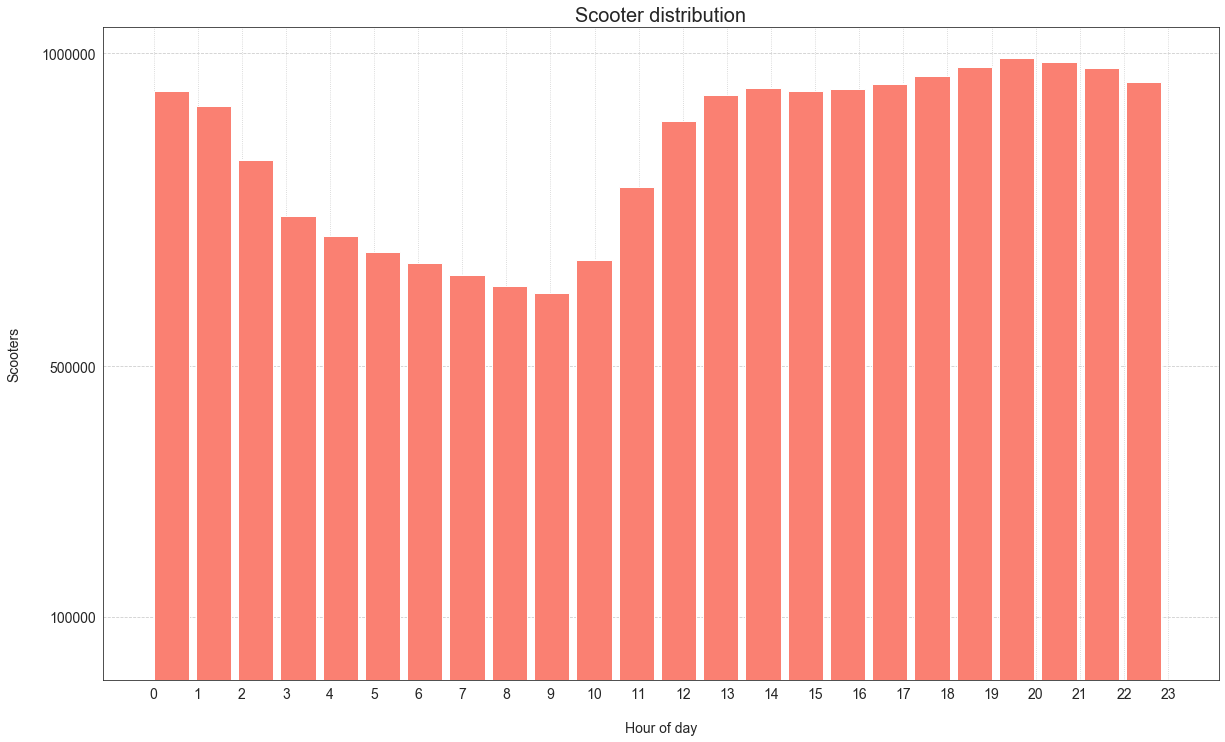

In [3]:
may_df['pubdatetime'].dt.hour.plot(kind='hist',
                                figsize=(20, 12),
                                color='salmon',
                                bins=24,
                                xticks=[i for i in range(24)],
                                yticks=[100000, 500000, 1000000],
                                width=0.8);

plt.title('Scooter distribution', fontsize=20)
plt.ylabel('Scooters\n', fontsize=14);
plt.xlabel('\nHour of day', fontsize=14);
plt.gca().xaxis.grid(linestyle=':');
plt.gca().yaxis.grid(linestyle='--');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

Seems to be a large drop off of scooter data point observations between 12am - 10am

## Scooter density sampling

---

My plan is to check density of scooters using two points of time. We'll check to see if companies pick them up on arbitrary day one, and disperse them on day 2. For this I'll filter down the `DataFrame` into 2 groups:
 
 - late night of day one
 - early hours of day two

Because of the size of the data, specify fraction float to select a percentage of the data frame to sample randomly below.

In [4]:
frac = 0.0015

night_df = may_df[may_df['pubdatetime'].dt.hour.isin([0])].sample(frac=frac)
print(len(night_df))
morn_df = may_df[may_df['pubdatetime'].dt.hour.isin([12])].sample(frac=frac)
print(len(morn_df))

1409
1337


---

We'll make a `Point` object out of the `latitude` `longitude` columns then remove them keeping `geometry` column.

In [5]:
# night_df['geometry'] = night_df.apply(lambda x: Point((float(x.longitude), float(x.latitude))), axis=1)
night_df['geometry'] = night_df.apply(lambda x: list((float(x.longitude), float(x.latitude))), axis=1)
stripped_night_df = night_df.drop(night_df.columns[[1, 2, 4]], axis=1)

In [6]:
morn_df['geometry'] = morn_df.apply(lambda x: list((float(x.longitude), float(x.latitude))), axis=1)
stripped_morn_df = morn_df.drop(night_df.columns[[1, 2, 4]], axis=1) 
stripped_morn_df.head(3)

,pubdatetime,sumdid,companyname,geometry
4074049,2019-05-09 12:12:38.660,Powered707354,1,"[-86.77835999999998, 36.165013]"
8698259,2019-05-18 12:55:32.237,Powered1689006,4,"[-86.81132, 36.14804]"
14135022,2019-05-25 12:39:13.000,Powered1aa1005c-7975-5666-8acc-07e8b91dca8b,5,"[-86.795, 36.1471]"


---

## Sample Geolocation of scooters

Being as the data sets we are dealing with are large, we'll loop through random sampling of `stripped_morn_df`, `stripped_night_df`, placing them on a nashville map below

In [7]:
nashville_map = folium.Map(location=[36.174465, -86.767960], zoom_start=12)

for geo in stripped_night_df['geometry']:
    folium.Circle([geo[1], geo[0]],
                                radius=4,
                                color='slateblue',
                                opacity=0.7
                                ).add_to(nashville_map)
    
for geo in stripped_morn_df['geometry']:
    folium.Circle([geo[1], geo[0]],
                                radius=4,
                                color='salmon',
                                opacity=0.7
                                ).add_to(nashville_map)

nashville_map